In [302]:
import numpy as np
import pandas as pd

In [303]:
df=pd.read_csv("spam.csv",encoding="latin1")

In [304]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1963,ham,Yes :)it completely in out of form:)clark also...,NaN,NaN,NaN
272,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...,NaN,NaN,NaN
5170,ham,I'm in school now n i'll be in da lab doing so...,NaN,NaN,NaN
2007,ham,Hi here. have birth at on the to at 8lb 7oz....,NaN,NaN,NaN
3170,ham,Still otside le..u come 2morrow maga..,NaN,NaN,NaN


In [305]:
df.shape

(5572, 5)

In [306]:
# 1.Data Cleaning


In [307]:
# 2.EDA

In [308]:
# 3.Text

### 1.Data Cleaning

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [310]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [311]:
df.sample(5)

,v1,v2
3781,ham,How r Ì_ going to send it to me?
2848,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...
4829,ham,"The word \Checkmate\"" in chess comes from the ..."
5351,ham,Yup it's at paragon... I havent decided whethe...
1379,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...


In [312]:
# Renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2802,spam,FreeMsg>FAV XMAS TONES!Reply REAL
2459,ham,Nope. Meanwhile she talk say make i greet you.
1300,ham,Those cocksuckers. If it makes you feel better...
3716,ham,I'm gonna rip out my uterus.
4914,ham,We took hooch for a walk toaday and i fell ove...


In [313]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [314]:
df['target'] = encoder.fit_transform(df['target'])

In [315]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [316]:
# missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [317]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [318]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [319]:
df.duplicated().sum()

np.int64(0)

### 2.EDA

In [320]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [321]:
# Data Distribution
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

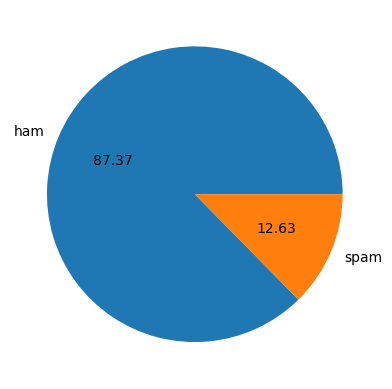

In [322]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [323]:
# Data is imbalaced

In [324]:
import nltk

In [325]:
# No. of characters in text
df['num_characters'] = df['text'].apply(len)

In [326]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [327]:
# number of words in text
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [328]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [329]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [330]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [331]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [332]:
# ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [333]:
# spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [334]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

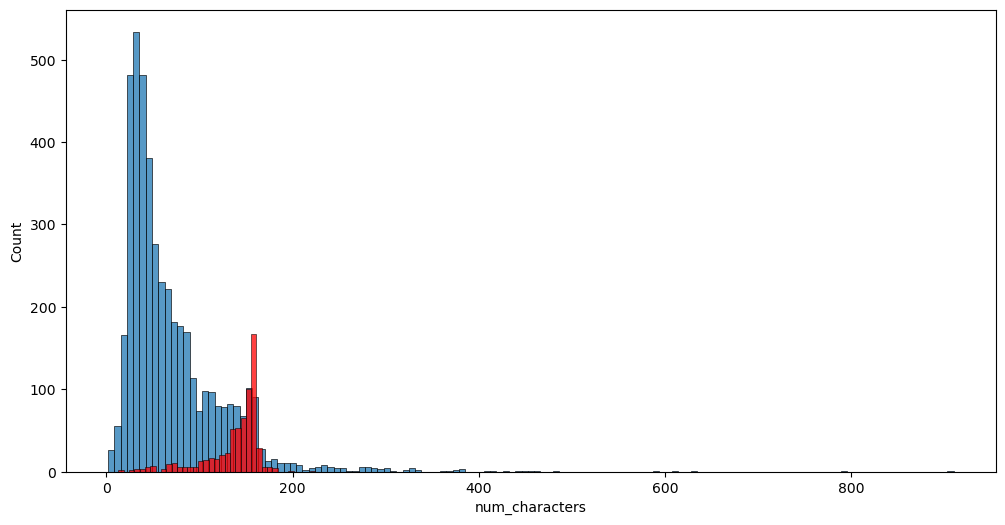

In [335]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

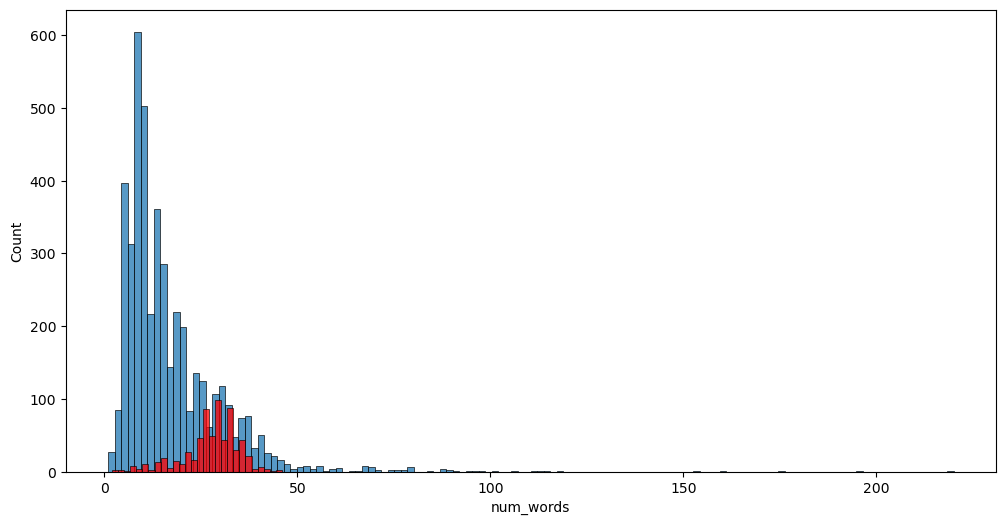

In [336]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

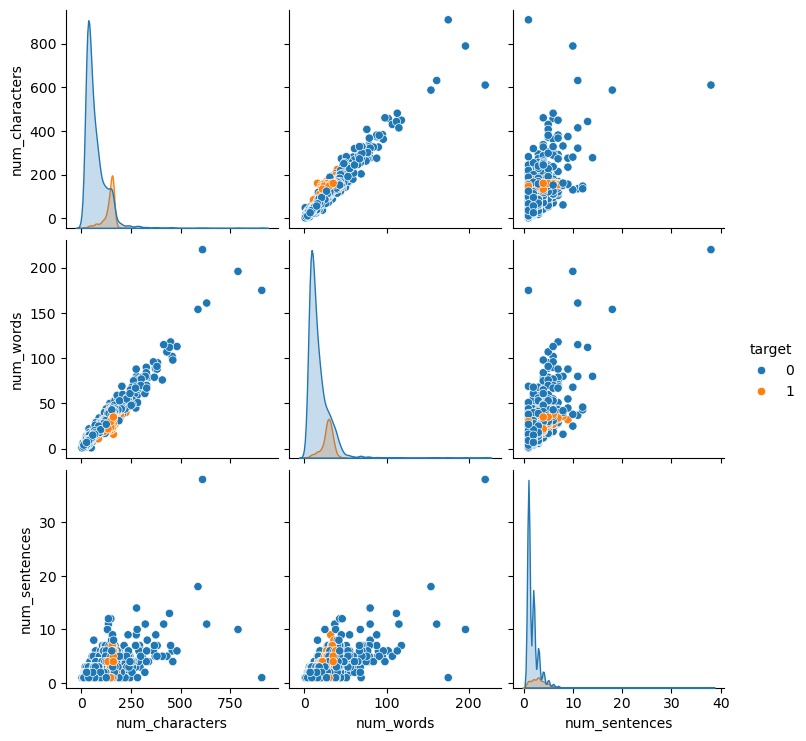

In [337]:
sns.pairplot(df,hue='target')

### 3.Data Proprocessing

1.Lower Case
2.Tokenization
3.Remove special characters
4.Remove stop words and punctuation
5.Stemming

In [338]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer


In [339]:
def transform_text(text):
    
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        ps = PorterStemmer()
        y.append(ps.stem(i))

        
    return  " ".join(y)

In [340]:
transform_text('I loved the YT lectures on Machine Learning.How about you?')

'love yt lectur machin'

In [341]:
df['transformed_text'] = df['text'].apply(transform_text)

In [342]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [343]:
# Word Cloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [344]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

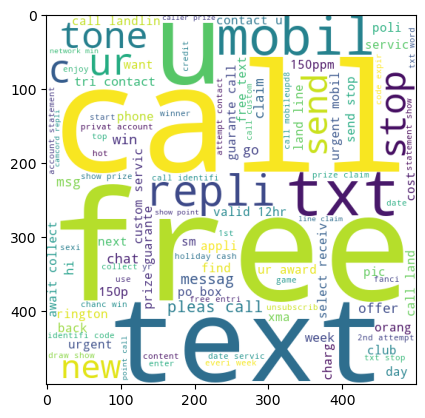

In [345]:
plt.imshow(spam_wc)

In [346]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

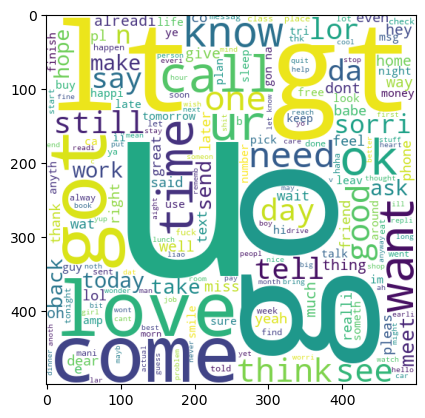

In [347]:
plt.imshow(spam_wc)

In [348]:
print(df.columns)

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')


In [349]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [350]:
len(spam_corpus)

9939

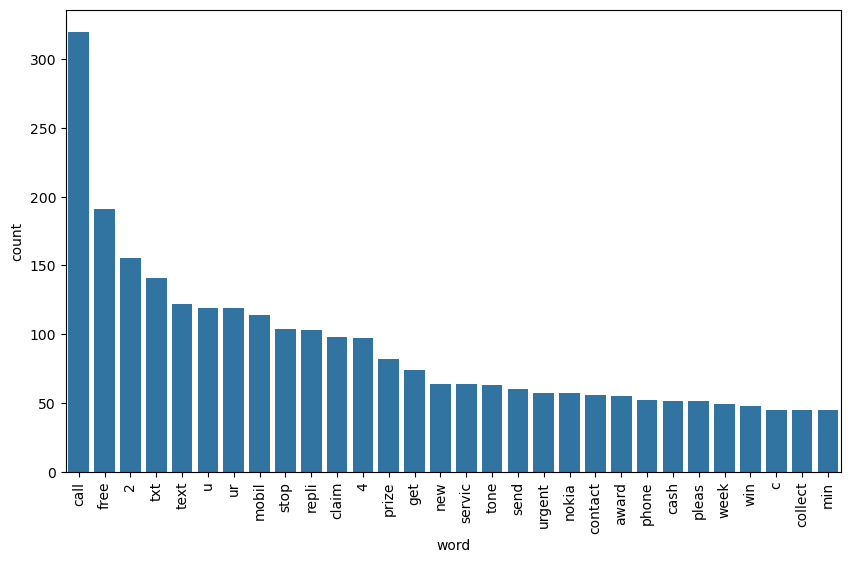

In [353]:
# Top 30 spam words
from collections import Counter
spam_word_counts = Counter(spam_corpus).most_common(30)
df_spam = pd.DataFrame(spam_word_counts, columns=['word', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(x=df_spam['word'], y=df_spam['count'])
plt.xticks(rotation=90)
plt.show()

In [354]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')

In [355]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [357]:
len(ham_corpus)

35404

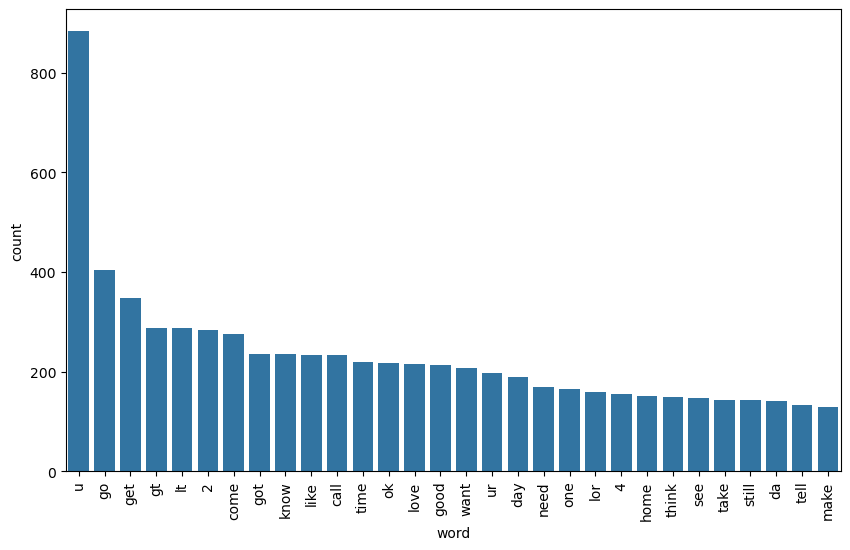

In [361]:
# Top 30 Ham words
from collections import Counter
ham_word_counts = Counter(ham_corpus).most_common(30)
df_ham = pd.DataFrame(ham_word_counts, columns=['word', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(x=df_ham['word'], y=df_ham['count'])
plt.xticks(rotation=90)
plt.show()

In [362]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### 4.Model Building

In [460]:
# Text Vectorization--> Bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [461]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [462]:
# Scaling using minmax scaler precision decrease
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [463]:
# # appending the num_character col to x
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [464]:
X.shape

(5169, 3000)

In [465]:
y = df['target'].values

In [466]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [467]:
from sklearn.model_selection import train_test_split

In [468]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [469]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [470]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [471]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [472]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [473]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [474]:
# tfidf with mnbd

In [476]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))